In [683]:
# 임포트할 모듈 정리
from PIL import Image
from keras.callbacks import ReduceLROnPlateau
import keras
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [889]:
# 함수 부분!
def resize_images(img_path):  # 28*28이 아닌 사진파일들을 변환해 주는 함수입니다!
    images=glob.glob(img_path + "/*.jpg")  
    print(len(images), " images to be resized.")
    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    print(len(images), " images resized.")


def load_data(img_path, number_of_data=300):  # x_train, y_train 에 데이터를 넣어주는 함수입니다!
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
    print("학습데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels


def set_model():  # 사용 모델을 설정하고 하이퍼 피라미터를 설정 합니다.
# https://junstar92.tistory.com/102
# https://wikidocs.net/61374
# https://studyfield.tistory.com/652
    # 모델 설계
    model=keras.models.Sequential()
    model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3), kernel_regularizer=keras.regularizers.l2(0.001)))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.MaxPooling2D(2,2))
    
    model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
    model.add(keras.layers.Dropout(0.1))
    model.add(keras.layers.MaxPooling2D((2,2)))
    
    model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2,2)))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(3, activation='softmax'))
    
    # 모델 개요
    model.summary()
    return model


def edu_model(model, x_train, y_train):  # 선정한 모델으로 학습을 시작합니다.
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(x_train_norm, y_train, validation_split=0.3, epochs=30)

def test_model(model):  # 학습이 잘 되었는지 다른종류의 가위바위보 사진을 통해 검증해 봅시다!(tesorflow 공식 가위바위보 이미지파일)
    test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
    print("test_loss: {} ".format(test_loss))
    print("test_accuracy: {}".format(test_accuracy))

In [883]:
# resize_images()
path = ["/aiffel/rock_scissor_paper/scissor", "/aiffel/rock_scissor_paper/rock", "/aiffel/rock_scissor_paper/paper",  # 가위 이미지가 저장된 디렉토리! 여러번 쓰기 싫어용~ (테스트 포함)
    "/aiffel/rock_scissor_paper/test/scissor", "/aiffel/rock_scissor_paper/test/rock", "/aiffel/rock_scissor_paper/test/paper"]
for path in path:
    print(path)
    image_dir_path = os.getenv("HOME") + path
    resize_images(image_dir_path)
    

/aiffel/rock_scissor_paper/scissor
200  images to be resized.
200  images resized.
/aiffel/rock_scissor_paper/rock
200  images to be resized.
200  images resized.
/aiffel/rock_scissor_paper/paper
200  images to be resized.
200  images resized.
/aiffel/rock_scissor_paper/test/scissor
124  images to be resized.
124  images resized.
/aiffel/rock_scissor_paper/test/rock
124  images to be resized.
124  images resized.
/aiffel/rock_scissor_paper/test/paper
124  images to be resized.
124  images resized.


In [884]:
# load_data()
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper" # 일반 데이터
(x_train, y_train)=load_data(image_dir_path,3000)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

test_image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test" # 테스트용 데이터
(x_test, y_test)=load_data(test_image_dir_path,372)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터의 이미지 개수는 600 입니다.
x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)
학습데이터의 이미지 개수는 372 입니다.
x_test shape: (372, 28, 28, 3)
y_test shape: (372,)


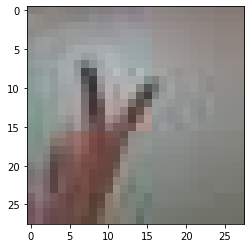

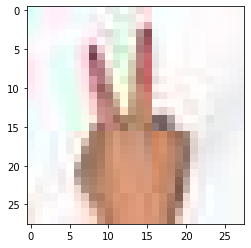

In [885]:
# 시험용 이미지가 잘 들어왔는지 출력해 봅시다!
plt.imshow(x_train[0])
plt.show()
# 검증용 테스트 이미지가 잘 들어왔는지도 출력해 봅시다!
plt.imshow(x_test[0])
plt.show()

In [896]:
# set_model()
model = set_model()

Model: "sequential_162"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_393 (Conv2D)          (None, 26, 26, 16)        448       
_________________________________________________________________
dropout_188 (Dropout)        (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_373 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_394 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
dropout_189 (Dropout)        (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_374 (MaxPoolin (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_395 (Conv2D)          (None, 3, 3, 64)       

In [897]:
# edu_model()
edu_model(model,x_train,y_train)

Epoch 1/30
66/66 [==============================] - 1s 6ms/step - loss: 0.7770 - accuracy: 0.8105 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 2/30
66/66 [==============================] - 0s 5ms/step - loss: 0.3152 - accuracy: 0.8243 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 3/30
66/66 [==============================] - 0s 4ms/step - loss: 0.3032 - accuracy: 0.8471 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 4/30
66/66 [==============================] - 0s 4ms/step - loss: 0.2737 - accuracy: 0.8776 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 5/30
66/66 [==============================] - 0s 4ms/step - loss: 0.2620 - accuracy: 0.8786 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 6/30
66/66 [==============================] - 0s 4ms/step - loss: 0.2157 - accuracy: 0.9214 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 7/30
66/66 [==============================] - 0s 4ms/step - loss: 0.1966 - accuracy: 0.9267 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 8/30
66/66 [==

In [898]:
# test_model()
test_model(model)

12/12 - 0s - loss: 2.9996 - accuracy: 0.6478
test_loss: 2.999584674835205 
test_accuracy: 0.647849440574646
